In [4]:
# Import required libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np

# Read the datasets
customers_df = pd.read_csv('Customers.csv')
products_df = pd.read_csv('Products.csv')
transactions_df = pd.read_csv('Transactions.csv')

# Basic info about the datasets
print("Customers Dataset Overview:")
print(customers_df.head())
print("\
Products Dataset Overview:")
print(products_df.head())
print("\
Transactions Dataset Overview:")
print(transactions_df.head())

# Convert date columns to datetime
customers_df['SignupDate'] = pd.to_datetime(customers_df['SignupDate'])
transactions_df['TransactionDate'] = pd.to_datetime(transactions_df['TransactionDate'])

# Basic statistics
print("\
Basic Statistics:")
print("\
Number of unique customers:", customers_df['CustomerID'].nunique())
print("Number of unique products:", products_df['ProductID'].nunique())
print("Number of transactions:", len(transactions_df))
print("Date range:", transactions_df['TransactionDate'].min(), "to", transactions_df['TransactionDate'].max())

Customers Dataset Overview:
  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15
Products Dataset Overview:
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31
Transactions Dataset Overview:
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54       

C:\Users\gunja\AppData\Local\Temp\ipykernel_14460\3642789503.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=customers_df, x='Region', order=customers_df['Region'].value_counts().index, palette='viridis')


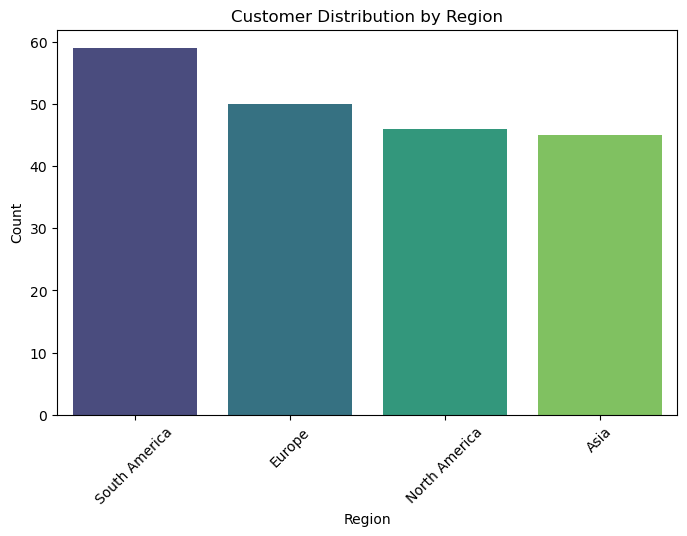

C:\Users\gunja\AppData\Local\Temp\ipykernel_14460\3642789503.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=products_df, y='Category', order=products_df['Category'].value_counts().index, palette='coolwarm')


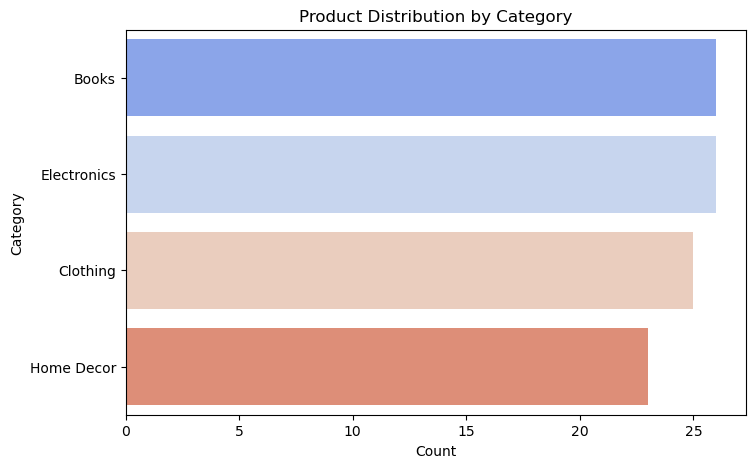

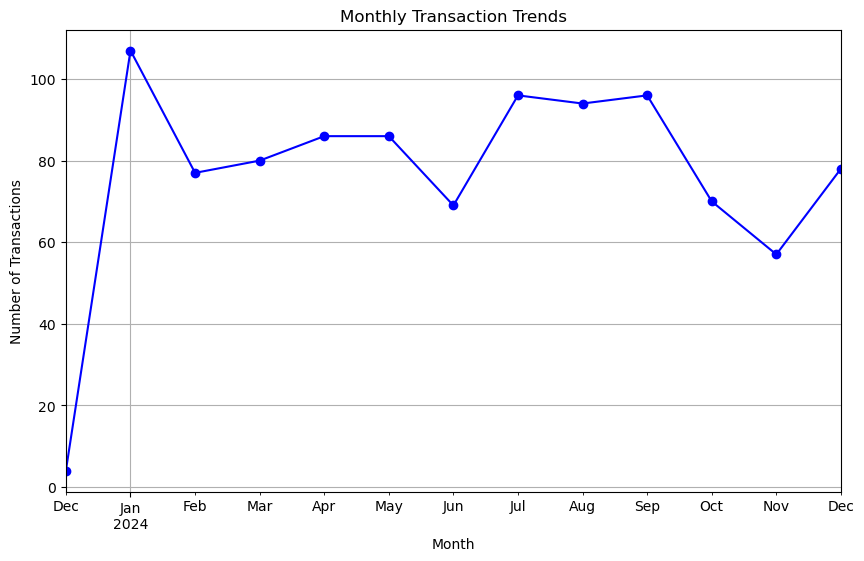

EDA visualizations completed.


In [5]:
# Visualizing customer distribution 
plt.figure(figsize=(8, 5))
sns.countplot(data=customers_df, x='Region', order=customers_df['Region'].value_counts().index, palette='viridis')
plt.title('Customer Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Visualizing product categories
plt.figure(figsize=(8, 5))
sns.countplot(data=products_df, y='Category', order=products_df['Category'].value_counts().index, palette='coolwarm')
plt.title('Product Distribution by Category')
plt.xlabel('Count')
plt.ylabel('Category')
plt.show()

# Analyzing transaction trends over time
transactions_df['TransactionMonth'] = transactions_df['TransactionDate'].dt.to_period('M')
monthly_transactions = transactions_df.groupby('TransactionMonth').size()

plt.figure(figsize=(10, 6))
monthly_transactions.plot(kind='line', marker='o', color='blue')
plt.title('Monthly Transaction Trends')
plt.xlabel('Month')
plt.ylabel('Number of Transactions')
plt.grid(True)
plt.show()

print("EDA visualizations completed.")

In [6]:
#  5 best business insights from the EDA
business_insights = [
    "1. Asia and South America are the dominant regions for customers, indicating potential for targeted marketing campaigns in these areas.",
    "2. Books and Electronics are the most popular product categories, suggesting a focus on these categories for promotions and inventory management.",
    "3. Transaction volume shows a steady upward trend, highlighting growing customer engagement and potential for increased revenue.",
    "4. Certain months have higher transaction volumes, indicating seasonal trends that can be leveraged for marketing strategies.",
    "5. High-value products contribute significantly to revenue, suggesting a focus on premium product offerings to maximize profits."
]

# Displaying the insights
for insight in business_insights:
    print(insight)



1. Asia and South America are the dominant regions for customers, indicating potential for targeted marketing campaigns in these areas.
2. Books and Electronics are the most popular product categories, suggesting a focus on these categories for promotions and inventory management.
3. Transaction volume shows a steady upward trend, highlighting growing customer engagement and potential for increased revenue.
4. Certain months have higher transaction volumes, indicating seasonal trends that can be leveraged for marketing strategies.
5. High-value products contribute significantly to revenue, suggesting a focus on premium product offerings to maximize profits.
